In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### DATA    

In [2]:
symbol = "EURUSD=X"
#start = "2022-08-27"
start = "2004-01-01"
end = "2024-08-20"
interval = '1d'

### Variables

In [3]:
lags = 42

## Downloading Data

In [4]:
df = yf.download(symbol, start, end, interval=interval)
#df.rename(columns={"Close": "price"}, inplace=True)
df.drop(columns=['Adj Close', 'Volume'], inplace=True)
#df.index = df.index.tz_convert('utc')
df['returns'] = np.log(df['Close'].div(df['Close'].shift(1)))
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,returns
Date,,,,,
2004-01-01,1.259002,1.260796,1.247396,1.258194,NaN
2004-01-02,1.258194,1.262802,1.252693,1.258194,0.000000
2004-01-05,1.263903,1.269406,1.263695,1.268698,0.008313
2004-01-06,1.268907,1.280803,1.267202,1.272103,0.002681
2004-01-07,1.272394,1.273999,1.262499,1.264095,-0.006315
...,...,...,...,...,...
2024-08-13,1.093625,1.096251,1.091572,1.093625,0.002054
2024-08-14,1.099699,1.104850,1.098829,1.099699,0.005538
2024-08-15,1.101322,1.101686,1.095050,1.101322,0.001475


In [5]:
df['day_of_week'] = df.index.dayofweek
df

,Open,High,Low,Close,returns,day_of_week
Date,,,,,,
2004-01-01,1.259002,1.260796,1.247396,1.258194,NaN,3
2004-01-02,1.258194,1.262802,1.252693,1.258194,0.000000,4
2004-01-05,1.263903,1.269406,1.263695,1.268698,0.008313,0
2004-01-06,1.268907,1.280803,1.267202,1.272103,0.002681,1
2004-01-07,1.272394,1.273999,1.262499,1.264095,-0.006315,2
...,...,...,...,...,...,...
2024-08-13,1.093625,1.096251,1.091572,1.093625,0.002054,1
2024-08-14,1.099699,1.104850,1.098829,1.099699,0.005538,2
2024-08-15,1.101322,1.101686,1.095050,1.101322,0.001475,3


In [6]:
snp = yf.download('^SPX', start, end, interval=interval)
#snp.index = snp.index.tz_convert('utc')
snp.index = snp.index.ceil('h')
snp['snp_volatility'] = (snp['High'] -snp['Low']) / (snp['Open']+snp['Close']+snp['Low']+snp['High'])  *  4 ## not ideal because previous day might close lower or higher
snp['snp_returns'] = np.log(snp['Close'].div(snp['Close'].shift(1)))
snp.rename(columns={"Close": "snp_price", 'Volume': 'snp_volume' }, inplace=True)
snp.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace=True)
snp

[*********************100%%**********************]  1 of 1 completed


,snp_price,snp_volume,snp_volatility,snp_returns
Date,,,,
2004-01-02,1108.479980,1153200000,0.012393,NaN
2004-01-05,1122.219971,1578200000,0.012319,0.012319
2004-01-06,1123.670044,1494500000,0.005364,0.001291
2004-01-07,1126.329956,1704900000,0.008796,0.002364
2004-01-08,1131.920044,1868400000,0.006210,0.004951
...,...,...,...,...
2024-08-13,5434.430176,3648980000,0.011010,0.016707
2024-08-14,5455.209961,3380050000,0.008690,0.003816
2024-08-15,5543.220215,3723310000,0.008166,0.016004


In [7]:
forex_combined = snp.join(df, how='outer')
forex_combined

,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,returns,day_of_week
Date,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,1.259002,1.260796,1.247396,1.258194,NaN,3.0
2004-01-02,1108.479980,1.153200e+09,0.012393,NaN,1.258194,1.262802,1.252693,1.258194,0.000000,4.0
2004-01-05,1122.219971,1.578200e+09,0.012319,0.012319,1.263903,1.269406,1.263695,1.268698,0.008313,0.0
2004-01-06,1123.670044,1.494500e+09,0.005364,0.001291,1.268907,1.280803,1.267202,1.272103,0.002681,1.0
2004-01-07,1126.329956,1.704900e+09,0.008796,0.002364,1.272394,1.273999,1.262499,1.264095,-0.006315,2.0
...,...,...,...,...,...,...,...,...,...,...
2024-08-13,5434.430176,3.648980e+09,0.011010,0.016707,1.093625,1.096251,1.091572,1.093625,0.002054,1.0
2024-08-14,5455.209961,3.380050e+09,0.008690,0.003816,1.099699,1.104850,1.098829,1.099699,0.005538,2.0
2024-08-15,5543.220215,3.723310e+09,0.008166,0.016004,1.101322,1.101686,1.095050,1.101322,0.001475,3.0


In [8]:
gold_ticker = 'GC=F'
# Fetch historical data
gold_data = yf.download(gold_ticker, start=start, end=end,  interval=interval)
#gold_data.index = gold_data.index.tz_convert('utc')
gold_data.rename(columns={"Close": "gold_price", 'Volume': 'gold_volume' }, inplace=True)
gold_data.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace=True)
gold_data

[*********************100%%**********************]  1 of 1 completed


,gold_price,gold_volume
Date,,
2004-01-05,424.399994,20
2004-01-06,422.799988,20
2004-01-07,421.899994,20
2004-01-08,424.000000,20
2004-01-09,426.399994,20
...,...,...
2024-08-13,2466.699951,510
2024-08-14,2439.399902,274
2024-08-15,2453.100098,285


In [9]:
forex_combined = gold_data.join(forex_combined, how='outer')

In [10]:
forex_combined

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,returns,day_of_week
Date,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1.259002,1.260796,1.247396,1.258194,NaN,3.0
2004-01-02,NaN,NaN,1108.479980,1.153200e+09,0.012393,NaN,1.258194,1.262802,1.252693,1.258194,0.000000,4.0
2004-01-05,424.399994,20.0,1122.219971,1.578200e+09,0.012319,0.012319,1.263903,1.269406,1.263695,1.268698,0.008313,0.0
2004-01-06,422.799988,20.0,1123.670044,1.494500e+09,0.005364,0.001291,1.268907,1.280803,1.267202,1.272103,0.002681,1.0
2004-01-07,421.899994,20.0,1126.329956,1.704900e+09,0.008796,0.002364,1.272394,1.273999,1.262499,1.264095,-0.006315,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-13,2466.699951,510.0,5434.430176,3.648980e+09,0.011010,0.016707,1.093625,1.096251,1.091572,1.093625,0.002054,1.0
2024-08-14,2439.399902,274.0,5455.209961,3.380050e+09,0.008690,0.003816,1.099699,1.104850,1.098829,1.099699,0.005538,2.0
2024-08-15,2453.100098,285.0,5543.220215,3.723310e+09,0.008166,0.016004,1.101322,1.101686,1.095050,1.101322,0.001475,3.0


In [11]:
ffill_columns = ['gold_price', 'gold_volume', 'snp_returns', 'snp_volume', 'snp_price', 'snp_volatility']
forex_combined[ffill_columns] = forex_combined[ffill_columns].ffill()
forex_combined['dir'] = np.where(forex_combined['returns'] > 0, 1,0)
#forex_combined

In [12]:
forex_combined.dropna(inplace=True)
#forex_combined

In [13]:
extra_features = ["dir", 'Open', 'High', 'Low', 'Close', 'returns']
cols = []
#features = ffill_columns + extra_features
features =  extra_features
features

['dir', 'Open', 'High', 'Low', 'Close', 'returns']

In [14]:
for f in features:
    for lag in range(1, lags + 1):
        col = "{}_lag_{}".format(f, lag)
        forex_combined[col] = forex_combined[f].shift(lag)
        cols.append(col)
forex_combined.dropna(inplace=True)
#forex_combined

C:\Users\grigo\AppData\Local\Temp\ipykernel_34776\2920289451.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forex_combined[col] = forex_combined[f].shift(lag)
C:\Users\grigo\AppData\Local\Temp\ipykernel_34776\2920289451.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forex_combined[col] = forex_combined[f].shift(lag)
C:\Users\grigo\AppData\Local\Temp\ipykernel_34776\2920289451.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

In [15]:
#cols.append('day_of_week')

In [16]:
split = int(len(forex_combined)* 0.8)
train = forex_combined.iloc[:split].copy()
train

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_33,returns_lag_34,returns_lag_35,returns_lag_36,returns_lag_37,returns_lag_38,returns_lag_39,returns_lag_40,returns_lag_41,returns_lag_42
Date,,,,,,,,,,,,,,,,,,,,,
2004-03-03,392.399994,4.0,1151.030029,1.334500e+09,0.007536,0.001678,1.220197,1.222001,1.206899,1.219096,...,-0.016236,-0.003965,-0.010607,0.003523,-0.009216,0.006549,0.010547,-0.006315,0.002681,0.008313
2004-03-04,392.899994,86.0,1154.869995,1.265800e+09,0.004476,0.003331,1.219393,1.224095,1.214300,1.220703,...,-0.003552,-0.016236,-0.003965,-0.010607,0.003523,-0.009216,0.006549,0.010547,-0.006315,0.002681
2004-03-05,401.299988,1.0,1156.859985,1.398200e+09,0.012509,0.001722,1.220495,1.242699,1.217997,1.236797,...,0.018843,-0.003552,-0.016236,-0.003965,-0.010607,0.003523,-0.009216,0.006549,0.010547,-0.006315
2004-03-08,400.600006,11.0,1147.199951,1.254400e+09,0.011251,-0.008385,1.236507,1.242607,1.234598,1.242607,...,0.005542,0.018843,-0.003552,-0.016236,-0.003965,-0.010607,0.003523,-0.009216,0.006549,0.010547
2004-03-09,404.200012,5.0,1140.579956,1.499400e+09,0.009169,-0.005787,1.242607,1.246401,1.228697,1.231906,...,0.005204,0.005542,0.018843,-0.003552,-0.016236,-0.003965,-0.010607,0.003523,-0.009216,0.006549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-16,1798.699951,146.0,3215.570068,3.972860e+09,0.006790,-0.003412,1.141735,1.144300,1.137954,1.141719,...,0.003552,0.005635,0.003190,0.007199,-0.000441,-0.004126,-0.002742,0.005039,0.001158,0.008629
2020-07-17,1808.300049,24.0,3224.729980,4.012850e+09,0.008650,0.002845,1.138650,1.144165,1.137889,1.139212,...,0.000667,0.003552,0.005635,0.003190,0.007199,-0.000441,-0.004126,-0.002742,0.005039,0.001158
2020-07-20,1815.900024,89.0,3251.840088,3.979340e+09,0.013421,0.008372,1.143955,1.146789,1.140524,1.144296,...,0.005690,0.000667,0.003552,0.005635,0.003190,0.007199,-0.000441,-0.004126,-0.002742,0.005039


In [17]:
test = forex_combined.iloc[split:].copy()
test

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_33,returns_lag_34,returns_lag_35,returns_lag_36,returns_lag_37,returns_lag_38,returns_lag_39,returns_lag_40,returns_lag_41,returns_lag_42
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-23,1889.099976,133.0,3235.659912,4.296760e+09,0.017627,-0.012396,1.156671,1.162426,1.154215,1.156872,...,-0.001620,0.009029,0.004149,0.005690,0.000667,0.003552,0.005635,0.003190,0.007199,-0.000441
2020-07-24,1897.300049,474.0,3215.629883,3.689410e+09,0.008462,-0.006210,1.159501,1.164009,1.158171,1.159608,...,-0.001233,-0.001620,0.009029,0.004149,0.005690,0.000667,0.003552,0.005635,0.003190,0.007199
2020-07-27,1931.000000,364.0,3239.409912,3.970310e+09,0.008418,0.007368,1.165257,1.177953,1.165257,1.165257,...,0.002354,-0.001233,-0.001620,0.009029,0.004149,0.005690,0.000667,0.003552,0.005635,0.003190
2020-07-28,1944.699951,825.0,3218.439941,4.053180e+09,0.008534,-0.006494,1.176651,1.177579,1.170100,1.176928,...,0.002928,0.002354,-0.001233,-0.001620,0.009029,0.004149,0.005690,0.000667,0.003552,0.005635
2020-07-29,1953.500000,209835.0,3258.439941,4.478200e+09,0.011565,0.012352,1.172058,1.177899,1.171495,1.171880,...,-0.006830,0.002928,0.002354,-0.001233,-0.001620,0.009029,0.004149,0.005690,0.000667,0.003552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-13,2466.699951,510.0,5434.430176,3.648980e+09,0.011010,0.016707,1.093625,1.096251,1.091572,1.093625,...,-0.002155,0.004198,-0.001744,-0.004206,0.000860,0.000150,0.003592,-0.003420,-0.006897,0.006757
2024-08-14,2439.399902,274.0,5455.209961,3.380050e+09,0.008690,0.003816,1.099699,1.104850,1.098829,1.099699,...,-0.002759,-0.002155,0.004198,-0.001744,-0.004206,0.000860,0.000150,0.003592,-0.003420,-0.006897
2024-08-15,2453.100098,285.0,5543.220215,3.723310e+09,0.008166,0.016004,1.101322,1.101686,1.095050,1.101322,...,0.002652,-0.002759,-0.002155,0.004198,-0.001744,-0.004206,0.000860,0.000150,0.003592,-0.003420


In [18]:
mu, std = train.mean(), train.std()

In [19]:
train_standardized = (train-mu) / std

In [20]:
train_standardized

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_33,returns_lag_34,returns_lag_35,returns_lag_36,returns_lag_37,returns_lag_38,returns_lag_39,returns_lag_40,returns_lag_41,returns_lag_42
Date,,,,,,,,,,,,,,,,,,,,,
2004-03-03,-1.888119,-0.188670,-0.911367,-1.702213,-0.442109,0.114187,-0.338951,-0.361354,-0.401651,-0.348100,...,-2.131725,-0.517717,-1.390580,0.467428,-1.207130,0.865422,1.390623,-0.825469,0.357035,1.097037
2004-03-04,-1.886821,-0.185699,-0.905377,-1.753718,-0.739767,0.249350,-0.345489,-0.344409,-0.341768,-0.335019,...,-0.463791,-2.131611,-0.517161,-1.390570,0.467654,-1.207148,0.865129,1.390835,-0.825405,0.356714
2004-03-05,-1.865019,-0.188779,-0.902272,-1.654457,0.041659,0.117740,-0.336527,-0.193878,-0.311851,-0.204027,...,2.481105,-0.463451,-2.130744,-0.517115,-1.390026,0.467532,-1.207104,0.865372,1.391102,-0.825559
2004-03-08,-1.866836,-0.188417,-0.917343,-1.762264,-0.080712,-0.709014,-0.206212,-0.194628,-0.177526,-0.156745,...,0.732015,2.481843,-0.462905,-2.130764,-0.516721,-1.390033,0.467304,-1.206738,0.865591,1.390634
2004-03-09,-1.857491,-0.188634,-0.927670,-1.578587,-0.283290,-0.496496,-0.156567,-0.163925,-0.225272,-0.243834,...,0.687550,0.732516,2.481823,-0.462857,-2.130095,-0.516781,-1.389959,0.467571,-1.206709,0.865198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-16,1.762033,-0.183525,2.309482,0.275777,-0.514743,-0.302189,-0.977514,-0.990058,-0.959494,-0.977875,...,0.470297,0.744691,0.423539,0.950818,-0.053415,-0.538047,-0.356145,0.666898,0.156861,1.138545
2020-07-17,1.786951,-0.187946,2.323773,0.305757,-0.333786,0.209595,-1.002621,-0.991149,-0.960019,-0.998285,...,0.091019,0.470763,0.745005,0.423623,0.950962,-0.053505,-0.538111,-0.355829,0.667099,0.156568
2020-07-20,1.806677,-0.185590,2.366067,0.280635,0.130344,0.661727,-0.959443,-0.969915,-0.938701,-0.956905,...,0.751528,0.091434,0.471130,0.745103,0.423857,0.950810,-0.053648,-0.537785,-0.355722,0.666734


In [21]:
train_standardized.describe()

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_33,returns_lag_34,returns_lag_35,returns_lag_36,returns_lag_37,returns_lag_38,returns_lag_39,returns_lag_40,returns_lag_41,returns_lag_42
count,4.247000e+03,4.247000e+03,4.247000e+03,4.247000e+03,4.247000e+03,4.247000e+03,4247.000000,4.247000e+03,4.247000e+03,4.247000e+03,...,4.247000e+03,4.247000e+03,4.247000e+03,4247.000000,4.247000e+03,4.247000e+03,4.247000e+03,4.247000e+03,4.247000e+03,4.247000e+03
mean,1.070750e-16,-1.003828e-17,-5.353748e-17,-8.030622e-17,1.472281e-16,-1.673046e-18,0.000000,-1.070750e-16,-6.424498e-16,-5.353748e-16,...,6.692185e-18,-1.212959e-17,-1.631220e-17,0.000000,-1.254785e-18,-4.182616e-18,5.855662e-18,-1.422089e-17,5.019139e-18,-1.003828e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.933801e+00,-1.888153e-01,-1.651626e+00,-2.324407e+00,-1.033532e+00,-1.046514e+01,-1.810428,-1.817857e+00,-9.577048e+00,-1.813531e+00,...,-1.884324e+01,-1.884539e+01,-1.884131e+01,-18.842017,-1.883850e+01,-1.883742e+01,-1.883451e+01,-1.883310e+01,-1.883469e+01,-1.883229e+01
25%,-7.314027e-01,-1.879094e-01,-7.934721e-01,-5.584341e-01,-5.822119e-01,-3.389145e-01,-0.980430,-9.819463e-01,-9.593108e-01,-9.787018e-01,...,-4.396786e-01,-4.399507e-01,-4.398226e-01,-0.439773,-4.394561e-01,-4.395216e-01,-4.396023e-01,-4.394088e-01,-4.393091e-01,-4.395179e-01
50%,2.643882e-01,-1.849742e-01,-4.277109e-01,-6.856240e-02,-2.759788e-01,3.509131e-02,0.057478,5.865541e-02,5.222099e-02,5.875635e-02,...,3.270381e-03,3.673198e-03,4.129335e-03,0.004197,4.501846e-03,4.408772e-03,4.256006e-03,4.549905e-03,4.690168e-03,4.418604e-03
75%,5.717040e-01,-1.748463e-01,6.017788e-01,4.276781e-01,2.175358e-01,4.139942e-01,0.711984,7.111041e-01,7.089452e-01,7.111984e-01,...,4.458459e-01,4.451484e-01,4.445169e-01,0.444602,4.448323e-01,4.447119e-01,4.444876e-01,4.447555e-01,4.448872e-01,4.446022e-01
max,1.995635e+00,1.381043e+01,2.575601e+00,5.886091e+00,9.326769e+00,8.939978e+00,2.737316,2.719975e+00,2.677083e+00,2.742327e+00,...,2.099426e+01,2.099750e+01,2.099392e+01,20.994848,2.099157e+01,2.099018e+01,2.098661e+01,2.098567e+01,2.098773e+01,2.098449e+01


In [22]:

from keras.src.callbacks import EarlyStopping
import random
import numpy as np
import tensorflow as tf
from keras.api.layers import Dense, Dropout
from keras.api.models import Sequential
from keras.api.regularizers import l1, l2
from keras.api.optimizers import Adam

def set_seeds(seed = 100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
def cw(df):
    c0, c1 = np.bincount(df["dir"])
    w0 = (1/c0) * (len(df)) / 2
    w1 = (1/c1) * (len(df)) / 2
    return {0:w0, 1:w1}

optimizer = Adam(learning_rate = 0.0001)

def create_model(hl = 2, hu = 100, dropout = False, rate = 0.3, regularize = False,
                 reg = l1(0.0005), optimizer = optimizer, input_dim = None):
    if not regularize:
        reg = None
    model = Sequential()
    model.add(Dense(hu, input_dim = input_dim, activity_regularizer = reg ,activation = "relu", kernel_regularizer=l2(0.001), ))
    if dropout: 
        model.add(Dropout(rate, seed = 100))
    for layer in range(hl):
        model.add(Dense(hu, activation = "relu", activity_regularizer = reg, kernel_regularizer=l2(0.001),))
        if dropout:
            model.add(Dropout(rate, seed = 100))
    model.add(Dense(1, activation = "sigmoid"))
    
    
    
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [23]:
set_seeds(100)

model = create_model(hl=2, hu=50, dropout= True, input_dim=len(cols))
model.fit(x=train_standardized[cols], y=train['dir'], epochs=50, verbose=True,
          validation_split=0.2, shuffle=False, class_weight=cw(train), callbacks=[early_stopping] )

Epoch 1/50


C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\keras\src\trainers\data_adapters\data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5016 - loss: 0.9288 - val_accuracy: 0.5094 - val_loss: 0.8756
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5140 - loss: 0.9014 - val_accuracy: 0.5059 - val_loss: 0.8741
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5078 - loss: 0.8928 - val_accuracy: 0.4988 - val_loss: 0.8727
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5054 - loss: 0.8956 - val_accuracy: 0.4871 - val_loss: 0.8714
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5084 - loss: 0.8802 - val_accuracy: 0.4976 - val_loss: 0.8698
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5126 - loss: 0.8791 - val_accuracy: 0.5200 - val_loss: 0.8673
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4884 - loss: 0.8801 - val_accuracy: 0.5176 - val_loss: 0.8656
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5080 - loss: 0.8762 - val_accuracy: 0.5118 - val_

In [24]:
model.evaluate(train_standardized[cols], train['dir'])

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.6163 - loss: 0.7900


[0.7940068244934082, 0.5954791903495789]

In [25]:
predict = model.predict(train_standardized[cols])
predict

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


array([[0.53597605],
       [0.586959  ],
       [0.51305264],
       ...,
       [0.47008172],
       [0.4727865 ],
       [0.50069296]], dtype=float32)

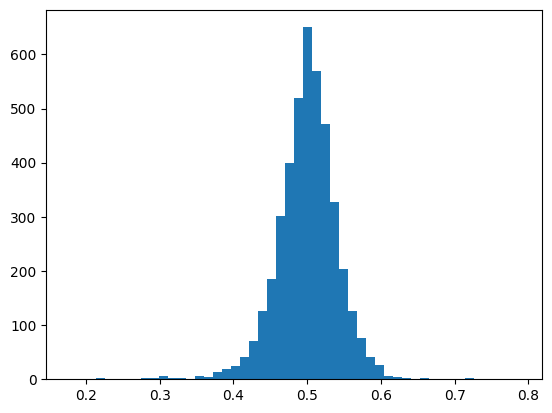

In [26]:
plt.hist(predict, bins=50)
plt.show()

In [27]:
test

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_33,returns_lag_34,returns_lag_35,returns_lag_36,returns_lag_37,returns_lag_38,returns_lag_39,returns_lag_40,returns_lag_41,returns_lag_42
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-23,1889.099976,133.0,3235.659912,4.296760e+09,0.017627,-0.012396,1.156671,1.162426,1.154215,1.156872,...,-0.001620,0.009029,0.004149,0.005690,0.000667,0.003552,0.005635,0.003190,0.007199,-0.000441
2020-07-24,1897.300049,474.0,3215.629883,3.689410e+09,0.008462,-0.006210,1.159501,1.164009,1.158171,1.159608,...,-0.001233,-0.001620,0.009029,0.004149,0.005690,0.000667,0.003552,0.005635,0.003190,0.007199
2020-07-27,1931.000000,364.0,3239.409912,3.970310e+09,0.008418,0.007368,1.165257,1.177953,1.165257,1.165257,...,0.002354,-0.001233,-0.001620,0.009029,0.004149,0.005690,0.000667,0.003552,0.005635,0.003190
2020-07-28,1944.699951,825.0,3218.439941,4.053180e+09,0.008534,-0.006494,1.176651,1.177579,1.170100,1.176928,...,0.002928,0.002354,-0.001233,-0.001620,0.009029,0.004149,0.005690,0.000667,0.003552,0.005635
2020-07-29,1953.500000,209835.0,3258.439941,4.478200e+09,0.011565,0.012352,1.172058,1.177899,1.171495,1.171880,...,-0.006830,0.002928,0.002354,-0.001233,-0.001620,0.009029,0.004149,0.005690,0.000667,0.003552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-13,2466.699951,510.0,5434.430176,3.648980e+09,0.011010,0.016707,1.093625,1.096251,1.091572,1.093625,...,-0.002155,0.004198,-0.001744,-0.004206,0.000860,0.000150,0.003592,-0.003420,-0.006897,0.006757
2024-08-14,2439.399902,274.0,5455.209961,3.380050e+09,0.008690,0.003816,1.099699,1.104850,1.098829,1.099699,...,-0.002759,-0.002155,0.004198,-0.001744,-0.004206,0.000860,0.000150,0.003592,-0.003420,-0.006897
2024-08-15,2453.100098,285.0,5543.220215,3.723310e+09,0.008166,0.016004,1.101322,1.101686,1.095050,1.101322,...,0.002652,-0.002759,-0.002155,0.004198,-0.001744,-0.004206,0.000860,0.000150,0.003592,-0.003420


In [28]:
test_standardized = (test-mu) / std
test_standardized

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_33,returns_lag_34,returns_lag_35,returns_lag_36,returns_lag_37,returns_lag_38,returns_lag_39,returns_lag_40,returns_lag_41,returns_lag_42
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-23,1.996673,-0.183996,2.340824,0.518606,0.539452,-1.037125,-0.855955,-0.843394,-0.827928,-0.854547,...,-0.209751,1.191164,0.549634,0.752443,0.092234,0.471320,0.744869,0.423786,0.950968,-0.053479
2020-07-24,2.017957,-0.171639,2.309576,0.063273,-0.352019,-0.531045,-0.832925,-0.830585,-0.795913,-0.832273,...,-0.158868,-0.209377,1.191392,0.549724,0.752620,0.092136,0.471091,0.745120,0.423965,0.950563
2020-07-27,2.105427,-0.175625,2.346675,0.273865,-0.356328,0.579610,-0.786081,-0.717756,-0.738584,-0.786302,...,0.312852,-0.158487,-0.208880,1.191508,0.549936,0.752481,0.091969,0.471357,0.745328,0.423634
2020-07-28,2.140987,-0.158920,2.313960,0.335993,-0.345027,-0.554342,-0.693352,-0.720786,-0.699398,-0.691312,...,0.388294,0.313297,-0.158000,-0.208821,1.191611,0.549809,0.752206,0.092257,0.471540,0.744951
2020-07-29,2.163828,7.414789,2.376363,0.654632,-0.050252,0.987293,-0.730728,-0.718193,-0.688107,-0.732398,...,-0.894855,0.388749,0.313693,-0.157939,-0.208480,1.191444,0.549568,0.752456,0.092406,0.471203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-13,3.495875,-0.170335,5.771084,0.032963,-0.104241,1.343572,-1.369057,-1.378835,-1.334782,-1.369317,...,-0.280102,0.555821,-0.225135,-0.548832,0.117538,0.024178,0.476358,-0.444940,-0.901844,0.892487
2024-08-14,3.425016,-0.178887,5.803502,-0.168655,-0.329879,0.289095,-1.319628,-1.309255,-1.276067,-1.319885,...,-0.359566,-0.279737,0.556171,-0.225077,-0.548433,0.117438,0.024022,0.476624,-0.444841,-0.901987
2024-08-15,3.460576,-0.178488,5.940805,0.088688,-0.380859,1.286087,-1.306419,-1.334862,-1.306638,-1.306676,...,0.352026,-0.359213,-0.279227,0.556261,-0.224733,-0.548491,0.117267,0.024315,0.476807,-0.445049


In [29]:
test_standardized.describe()

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,...,returns_lag_33,returns_lag_34,returns_lag_35,returns_lag_36,returns_lag_37,returns_lag_38,returns_lag_39,returns_lag_40,returns_lag_41,returns_lag_42
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,...,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,2.065503,-0.020199,3.983772,0.500069,-0.009534,0.023625,-1.223920,-1.228577,-1.202194,-1.224023,...,-0.003471,-0.001972,-0.001310,-0.000867,-0.000137,0.000477,0.000502,0.001407,0.002959,0.002526
std,0.460395,0.896801,0.819666,0.680127,0.680913,0.861111,0.512540,0.505685,0.512959,0.512759,...,0.610539,0.611720,0.611750,0.612116,0.611919,0.611992,0.612082,0.612144,0.612660,0.612565
min,1.306770,-0.188815,2.309576,-1.473553,-1.014914,-3.638617,-2.459669,-2.424596,-2.447773,-2.460004,...,-2.301896,-2.301805,-2.300906,-2.300933,-2.300234,-2.300185,-2.299963,-2.299533,-2.299603,-2.299549
25%,1.758270,-0.186233,3.418259,0.107856,-0.494017,-0.433466,-1.548529,-1.554918,-1.528810,-1.548802,...,-0.346804,-0.346448,-0.345925,-0.345872,-0.345186,-0.345257,-0.345353,-0.345038,-0.344479,-0.344701
50%,1.972534,-0.180662,3.914135,0.355219,-0.170977,0.046687,-1.372608,-1.381023,-1.347298,-1.373014,...,-0.005417,-0.005015,-0.004557,-0.004490,-0.002506,-0.001352,-0.001504,-0.000719,0.000634,-0.000850
75%,2.212884,-0.166141,4.391719,0.747099,0.276523,0.540952,-0.706742,-0.716296,-0.684586,-0.707576,...,0.372964,0.375200,0.375989,0.376817,0.377059,0.378180,0.377966,0.378808,0.379229,0.378904
max,3.586980,7.414789,6.134224,4.776746,4.074339,4.390265,-0.228436,-0.255970,-0.241491,-0.225892,...,2.397993,2.398720,2.398716,2.398881,2.398778,2.398536,2.397995,2.398147,2.398506,2.397896


In [30]:
model.evaluate(test_standardized[cols], test['dir'])

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5377 - loss: 0.8098


[0.8109835982322693, 0.5244821310043335]

In [31]:
pred = model.predict(test_standardized[cols])
pred

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.5192827 ],
       [0.5288054 ],
       [0.47802347],
       ...,
       [0.52371836],
       [0.50360405],
       [0.45647117]], dtype=float32)

In [32]:
test['probability'] = model.predict(test_standardized[cols])

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


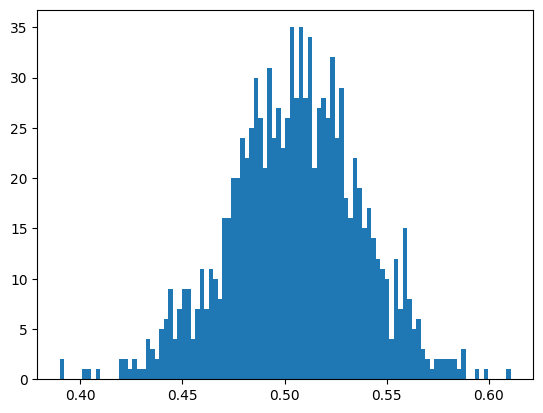

In [33]:
plt.hist(test['probability'], bins=100)
plt.show()

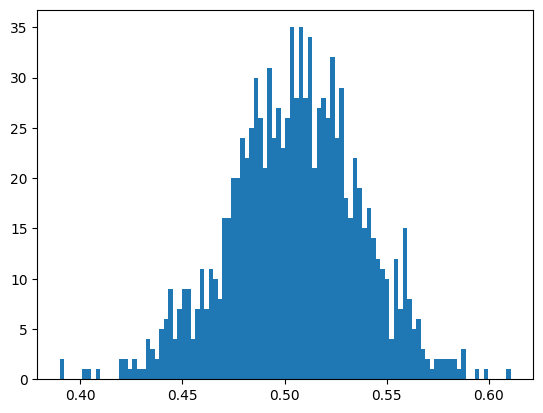

In [34]:
plt.hist(pred, bins=100)
plt.show()

In [35]:
threshold = 0.53

In [36]:
test['position'] = np.where(test.probability < (1-threshold), -1, np.nan)
test['position'] = np.where(test.probability > threshold, 1, test.position)

In [37]:
#test.index = test.index.tz_localize('utc')
#test['NYTime'] = test.index.tz_convert("America/New_York")
#test['hour'] = test.NYTime.dt.hour

In [38]:
#test['position'] = np.where(~test.hour.between(2,12), 0, test.position)

In [39]:
test.position.value_counts(dropna=False)

position
 NaN    702
 1.0    229
-1.0    131
Name: count, dtype: int64

In [40]:
test['position'] = test.position.ffill()

In [41]:
test.position.value_counts(dropna=False)

position
 1.0    650
-1.0    408
 NaN      4
Name: count, dtype: int64

In [72]:
lever = 2
test['strategy'] = test['position'] * test['returns']
test['levered_strategy'] = test['position'] * test['returns'] * lever

In [73]:
test['creturns'] = test['returns'].cumsum().apply(np.exp)
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)
test['cstrategy_levered'] = test['levered_strategy'].cumsum().apply(np.exp)

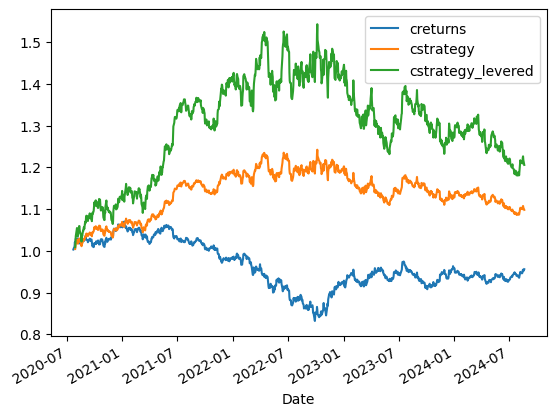

In [74]:
test[['creturns', 'cstrategy', 'cstrategy_levered']].plot()
plt.show()

In [45]:
ptc = 0.000059

In [46]:
test['trades'] = test.position.diff().abs()
test.trades.value_counts()

trades
0.0    877
2.0    180
Name: count, dtype: int64

In [78]:
test['strategy_net'] = test.strategy - test.trades * ptc
test['levered_strategy_net'] = test.levered_strategy - test.trades * ptc

In [79]:
test['cstrategy_net'] = test['strategy_net'].cumsum().apply(np.exp)
test['levered_cstrategy_net'] = test['levered_strategy_net'].cumsum().apply(np.exp)

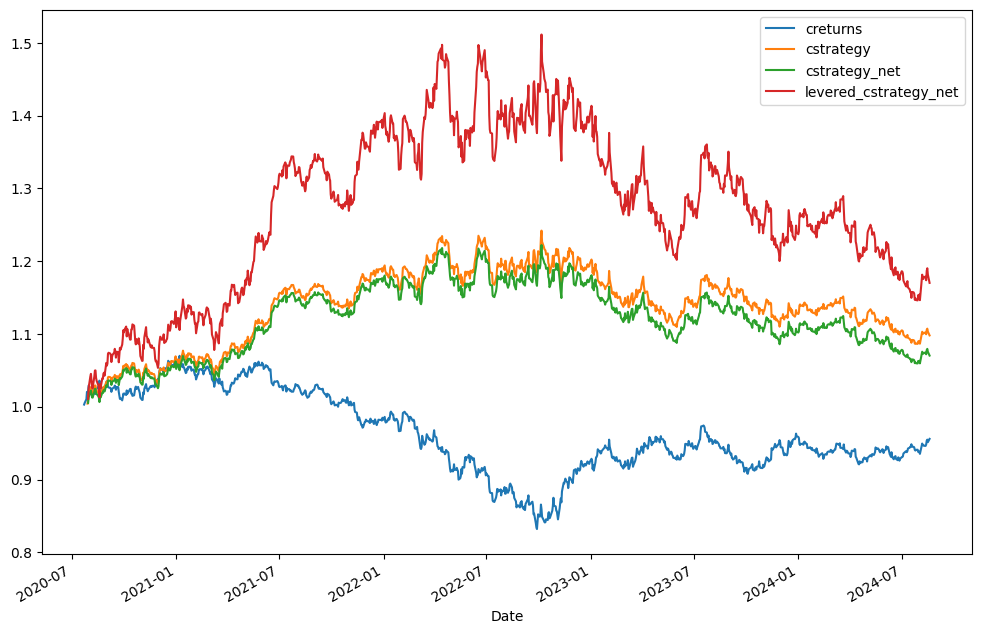

In [81]:
test[['creturns', 'cstrategy', 'cstrategy_net', 'levered_cstrategy_net']].plot(figsize=(12, 8))
plt.show()

In [50]:
#model.save('DNN_modelv2.keras')

In [51]:
import pickle

In [52]:
params = {'mu': mu, 'std': std}

In [53]:
#pickle.dump(params, open('paramsv2.pkl', 'wb'))

In [54]:
test[['strategy_net']].mean() * 252

strategy_net    0.016205
dtype: float64

In [55]:
train['probability2'] = model.predict(train_standardized[cols])

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step


In [56]:
wildtest = train.copy()
wildtest.drop(columns = cols, inplace=True)
wildtest

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,returns,day_of_week,dir,probability2
Date,,,,,,,,,,,,,,
2004-03-03,392.399994,4.0,1151.030029,1.334500e+09,0.007536,0.001678,1.220197,1.222001,1.206899,1.219096,-0.001073,2.0,0,0.535976
2004-03-04,392.899994,86.0,1154.869995,1.265800e+09,0.004476,0.003331,1.219393,1.224095,1.214300,1.220703,0.001317,3.0,1,0.586959
2004-03-05,401.299988,1.0,1156.859985,1.398200e+09,0.012509,0.001722,1.220495,1.242699,1.217997,1.236797,0.013098,4.0,1,0.513053
2004-03-08,400.600006,11.0,1147.199951,1.254400e+09,0.011251,-0.008385,1.236507,1.242607,1.234598,1.242607,0.004686,0.0,1,0.456963
2004-03-09,404.200012,5.0,1140.579956,1.499400e+09,0.009169,-0.005787,1.242607,1.246401,1.228697,1.231906,-0.008648,1.0,0,0.487765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-16,1798.699951,146.0,3215.570068,3.972860e+09,0.006790,-0.003412,1.141735,1.144300,1.137954,1.141719,0.000568,3.0,1,0.490029
2020-07-17,1808.300049,24.0,3224.729980,4.012850e+09,0.008650,0.002845,1.138650,1.144165,1.137889,1.139212,-0.002199,4.0,0,0.525380
2020-07-20,1815.900024,89.0,3251.840088,3.979340e+09,0.013421,0.008372,1.143955,1.146789,1.140524,1.144296,0.004453,0.0,1,0.470082


In [57]:
wildtest['position'] = np.where(wildtest.probability2 < (1-threshold), -1, np.nan)
wildtest['position'] = np.where(wildtest.probability2 > threshold, 1, wildtest.position)

In [58]:
wildtest

,gold_price,gold_volume,snp_price,snp_volume,snp_volatility,snp_returns,Open,High,Low,Close,returns,day_of_week,dir,probability2,position
Date,,,,,,,,,,,,,,,
2004-03-03,392.399994,4.0,1151.030029,1.334500e+09,0.007536,0.001678,1.220197,1.222001,1.206899,1.219096,-0.001073,2.0,0,0.535976,1.0
2004-03-04,392.899994,86.0,1154.869995,1.265800e+09,0.004476,0.003331,1.219393,1.224095,1.214300,1.220703,0.001317,3.0,1,0.586959,1.0
2004-03-05,401.299988,1.0,1156.859985,1.398200e+09,0.012509,0.001722,1.220495,1.242699,1.217997,1.236797,0.013098,4.0,1,0.513053,NaN
2004-03-08,400.600006,11.0,1147.199951,1.254400e+09,0.011251,-0.008385,1.236507,1.242607,1.234598,1.242607,0.004686,0.0,1,0.456963,-1.0
2004-03-09,404.200012,5.0,1140.579956,1.499400e+09,0.009169,-0.005787,1.242607,1.246401,1.228697,1.231906,-0.008648,1.0,0,0.487765,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-16,1798.699951,146.0,3215.570068,3.972860e+09,0.006790,-0.003412,1.141735,1.144300,1.137954,1.141719,0.000568,3.0,1,0.490029,NaN
2020-07-17,1808.300049,24.0,3224.729980,4.012850e+09,0.008650,0.002845,1.138650,1.144165,1.137889,1.139212,-0.002199,4.0,0,0.525380,NaN
2020-07-20,1815.900024,89.0,3251.840088,3.979340e+09,0.013421,0.008372,1.143955,1.146789,1.140524,1.144296,0.004453,0.0,1,0.470082,NaN


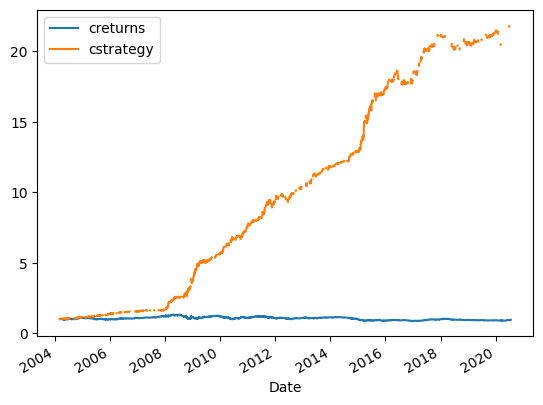

In [59]:
wildtest['strategy'] = wildtest['position'] * wildtest['returns']
wildtest['creturns'] = wildtest['returns'].cumsum().apply(np.exp)
wildtest['cstrategy'] = wildtest['strategy'].cumsum().apply(np.exp)
wildtest[['creturns', 'cstrategy']].plot()
plt.show()

In [91]:
wildtest[['creturns', 'cstrategy']].iloc[-1000]

creturns      0.914325
cstrategy    17.692817
Name: 2016-09-19 00:00:00, dtype: float64

In [60]:
y_pred_prob = model.predict(test_standardized[cols])

# Step 2: Convert Predicted Probabilities to Binary Labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 3: Compare Predictions with Actual Labels
correct_predictions = np.sum(y_pred.flatten() == test['dir'].values.flatten())


# Step 4: Calculate Accuracy
total_predictions = len(test['dir'])

accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy is : {accuracy}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy is : 52.4482109227872%


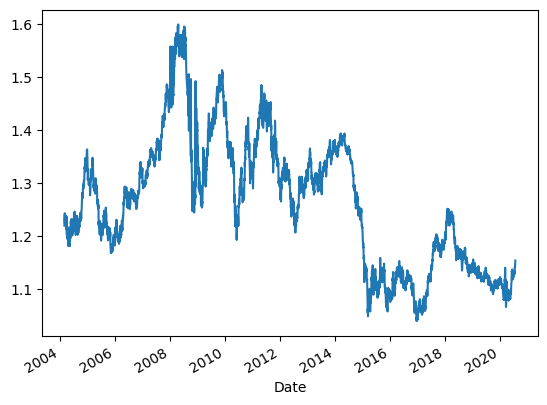

In [61]:
train.Close.plot()
plt.show()

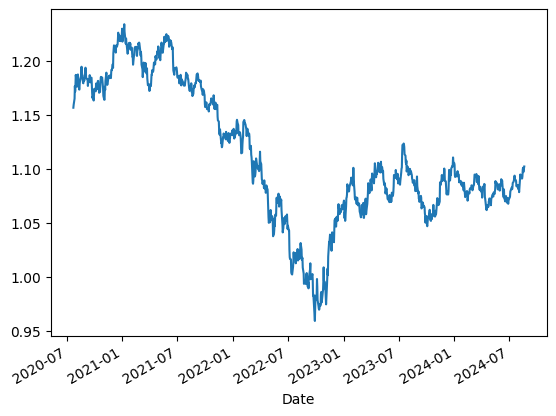

In [62]:
test.Close.plot()
plt.show()

In [63]:
resultsDf = pd.DataFrame(columns=['threshold', 'result'])

def test_threshhold(thr):
    thresh_test = test.copy()
    thresh_test['position'] = np.where(thresh_test.probability < (1-thr), -1, np.nan)
    thresh_test['position'] = np.where(test.probability > thr, 1, thresh_test.position)
    thresh_test['position'] = np.where(np.logical_and(thresh_test.probability>=1-thr, thresh_test.probability<=threshold), 0, thresh_test.position)
    thresh_test['strategy'] = test['position'] * test['returns']
    thresh_test['strategy'] = thresh_test['position'] * thresh_test['returns']
    thresh_test['creturns'] = thresh_test['returns'].cumsum().apply(np.exp)
    thresh_test['cstrategy'] = thresh_test['strategy'].cumsum().apply(np.exp)
    
    
    resultDict =  {
            'threshold': thr,
            'result': thresh_test['cstrategy'].iloc[-1],
        }
    resultsDf.loc[len(resultsDf)] = resultDict

values = np.arange(0.01, 1.00, 0.01).tolist() 
for thresh in values:
    test_threshhold(thresh)



    

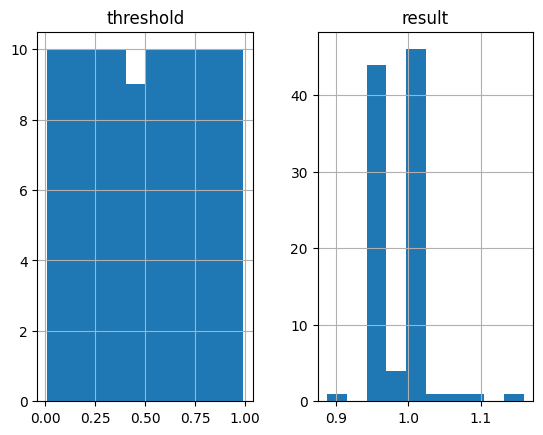

In [64]:
resultsDf.hist()
plt.show()

In [65]:
resultsDf

,threshold,result
0,0.01,0.955867
1,0.02,0.955867
2,0.03,0.955867
3,0.04,0.955867
4,0.05,0.955867
...,...,...
94,0.95,1.000000
95,0.96,1.000000
96,0.97,1.000000
97,0.98,1.000000


In [66]:
cw(train)

{0: 1.0002355157795573, 1: 0.9997645951035781}

<Axes: >

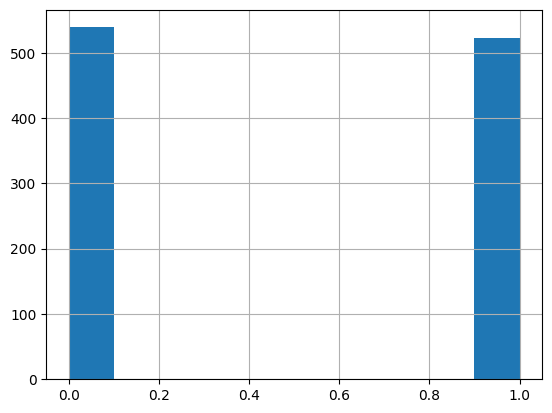

In [67]:
test.dir.hist()

In [68]:
test.dir.value_counts()

dir
0    539
1    523
Name: count, dtype: int64

In [69]:
train.dir.value_counts()

dir
1    2124
0    2123
Name: count, dtype: int64

In [70]:
test.cstrategy.iloc[-1]

1.0980213539619246

In [71]:
correlation = test['cstrategy'].corr(test['creturns'])
correlation

-0.6557406519857796

In [82]:
test.cstrategy_levered.iloc[-1]

1.2056508937563784

In [86]:
test.levered_strategy.mean()*252

0.04454530684243392

In [87]:
test.strategy.mean()*252

0.02227265342121696